## Importing Required Libraries

In [2]:
import pandas as pd
import os
import glob as gb
import tensorflow as tf



from tensorflow import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense


sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True, device_count = {'GPU': 1 , 'CPU': 56}))
tf.compat.v1.keras.backend.set_session(sess)


Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce GTX 1050 Ti, pci bus id: 0000:08:00.0, compute capability: 6.1
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device




In [3]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  1


## Assigning Path for Dataset

In [4]:
TRAIN_DIR = "D:/Downloads/Emotion-CNN/eINTERFACE_2021_Image/train"
TEST_DIR = "D:/Downloads/Emotion-CNN/eINTERFACE_2021_Image/test"
BATCH_SIZE=64

### Will see how many categories and images present

In [5]:
for folder in os.listdir(TRAIN_DIR):
    files = gb.glob(pathname= str(TRAIN_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For training data, found {len(files)} in folder {folder}')

For training data, found 1896 in folder Anger
For training data, found 1891 in folder Disgust
For training data, found 1922 in folder Fear
For training data, found 1922 in folder Happiness
For training data, found 1922 in folder Sadness
For training data, found 1922 in folder Surprise


In [6]:
for folder in os.listdir(TEST_DIR):
    files = gb.glob(pathname= str(TEST_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For testing data, found {len(files)} in folder {folder}')

For testing data, found 237 in folder Anger
For testing data, found 237 in folder Disgust
For testing data, found 241 in folder Fear
For testing data, found 241 in folder Happiness
For testing data, found 241 in folder Sadness
For testing data, found 241 in folder Surprise


### Will see some random images withe their labels

In [7]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
    # We will view images from here
    target_folder = target_dir + target_class
    
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    
    # read in the image and plot it using matplolib
    img = mpimg.imread(target_folder+'/'+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"Image shape {img.shape}")
    
    return img

In [8]:
class_names = ['Anger','Disgust','Fear','Happiness','Sadness','Surprise']

Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)


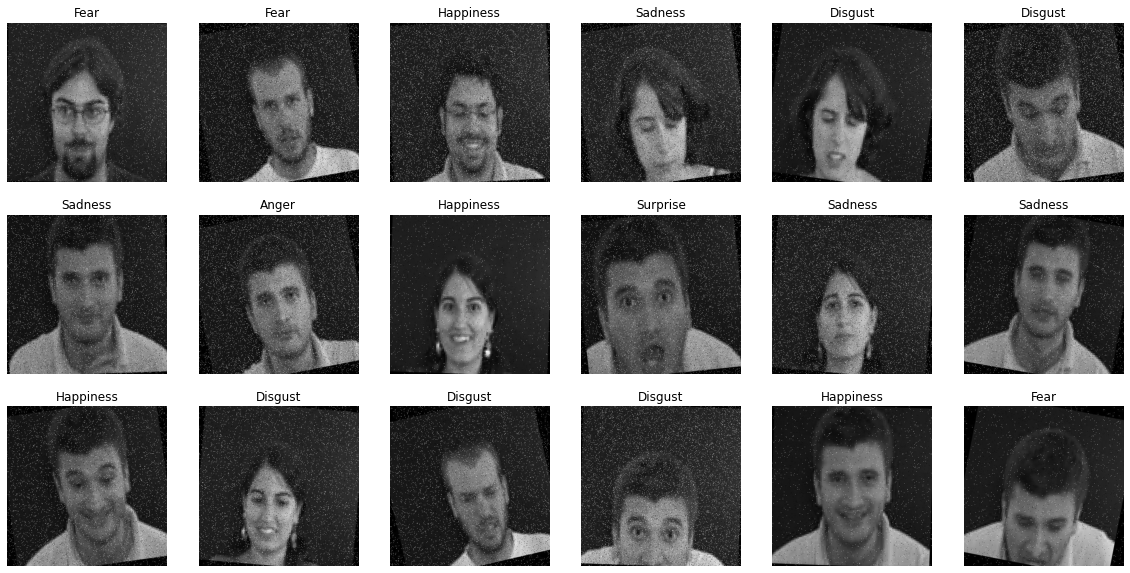

In [9]:
plt.figure(figsize=(20,10))
for i in range(18):
    plt.subplot(3, 6, i+1)
    class_name = random.choice(class_names)
    img = view_random_image(TRAIN_DIR+"/", target_class=class_name)

### Preparing data for training

In [22]:
def to_grayscale_then_rgb(image):
    image = tf.image.rgb_to_grayscale(image)
    image = tf.image.grayscale_to_rgb(image)
    return image

train_datagen = ImageDataGenerator( 
                                rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   
                                  )

test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory(TRAIN_DIR,
                                                 target_size = (128, 128),
                                                 batch_size = BATCH_SIZE,
                                                 class_mode = 'categorical' , color_mode="grayscale")

test_set = test_datagen.flow_from_directory(TEST_DIR,
                                            target_size = (128, 128),
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'categorical', color_mode="grayscale")

Found 11475 images belonging to 6 classes.
Found 1438 images belonging to 6 classes.


### Basic model building (CNN Classifier)

In [23]:
classifier = Sequential()
classifier.add(Conv2D(16, (3, 3), input_shape = (128, 128, 1), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(32, (3, 3), input_shape = (128, 128, 1), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Flatten())
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 6, activation = 'softmax'))
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [24]:

classifier.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 126, 126, 16)      160       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 28800)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               3686528   
_________________________________________________________________
dense_7 (Dense)              (None, 6)                

In [25]:
import  PIL

history = classifier.fit(training_set,
                         epochs = 50,
                         validation_data = test_set)


classifier.save('model1.h5')

Epoch 1/50
180/180 [==============================] - 188s 1s/step - loss: 1.7639 - accuracy: 0.2397 - val_loss: 1.6266 - val_accuracy: 0.3526
Epoch 2/50
180/180 [==============================] - 96s 531ms/step - loss: 1.5265 - accuracy: 0.3814 - val_loss: 1.4292 - val_accuracy: 0.4159
Epoch 3/50
180/180 [==============================] - 76s 420ms/step - loss: 1.3055 - accuracy: 0.4783 - val_loss: 1.1857 - val_accuracy: 0.5271
Epoch 4/50
180/180 [==============================] - 37s 208ms/step - loss: 1.1742 - accuracy: 0.5353 - val_loss: 1.1696 - val_accuracy: 0.5223
Epoch 5/50
180/180 [==============================] - 36s 200ms/step - loss: 1.0534 - accuracy: 0.5916 - val_loss: 0.9896 - val_accuracy: 0.6071
Epoch 6/50
180/180 [==============================] - 36s 199ms/step - loss: 0.9604 - accuracy: 0.6310 - val_loss: 0.9205 - val_accuracy: 0.6467
Epoch 7/50
180/180 [==============================] - 36s 198ms/step - loss: 0.8776 - accuracy: 0.6661 - val_loss: 0.8463 - val_accu

### Evaluating the model

In [26]:
classifier.evaluate(test_set)

23/23 [==============================] - 2s 106ms/step - loss: 0.3296 - accuracy: 0.8727


[0.32962363958358765, 0.8727399110794067]

Text(0, 0.5, 'Loss')

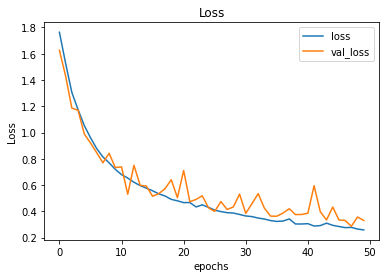

In [27]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

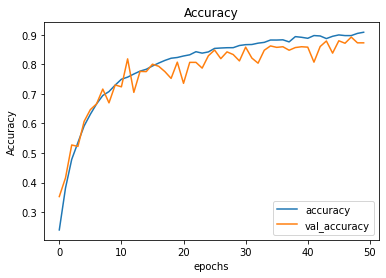

In [28]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')

ValueError: in user code:

    C:\Users\Hayden\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1462 predict_function  *
        return step_function(self, iterator)
    C:\Users\Hayden\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Hayden\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Hayden\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Hayden\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Hayden\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1445 run_step  **
        outputs = model.predict_step(data)
    C:\Users\Hayden\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1418 predict_step
        return self(x, training=False)
    C:\Users\Hayden\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\Hayden\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:191 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_3 is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: [None, 128, 128]


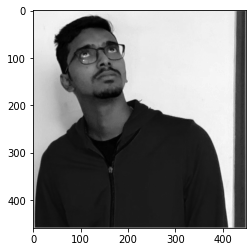

In [36]:
from PIL import Image, ImageOps

model_path = "model1.h5"
loaded_model = keras.models.load_model(model_path)

import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

image = cv2.imread(r"D:\BEFINAL\5-152.jpg")
image_fromarray = Image.fromarray(image, 'RGB')
image_fromarray = ImageOps.grayscale(image_fromarray)
resize_image = image_fromarray.resize((128, 128))

plt.imshow(image_fromarray ,cmap="gray")
expand_input = np.expand_dims(resize_image,axis=0)
input_data = np.array(expand_input)
input_data = input_data/255

pred = loaded_model.predict(input_data)
result = pred.argmax()
class_names[result]

In [37]:
training_set.class_indices

{'Anger': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happiness': 3,
 'Sadness': 4,
 'Surprise': 5}

In [38]:
layer_outputs = [layer.output for layer in classifier.layers[:12]] # Extracts the outputs of the top 12 layers
activation_model =tf.keras.models.Model(inputs=classifier.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

In [39]:
activations = activation_model.predict(input_data) # Returns a list of five Numpy arrays: one array per layer activation

In [40]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 126, 126, 16)


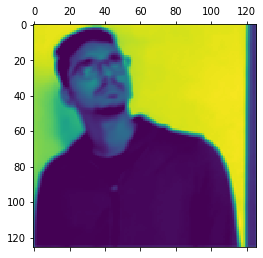

In [41]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')


C:\Users\Hayden\AppData\Local\Temp/ipykernel_17728/2139611158.py:18: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


MemoryError: Unable to allocate 174. TiB for an array with shape (51840000, 460800) and data type float64

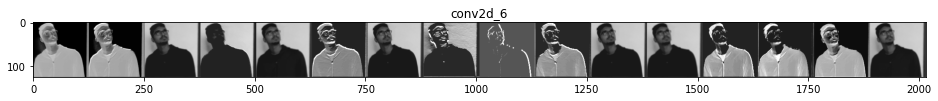

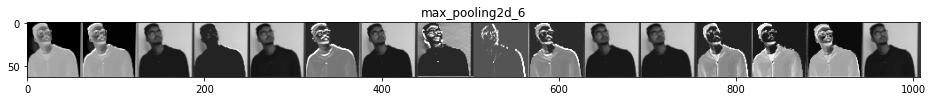

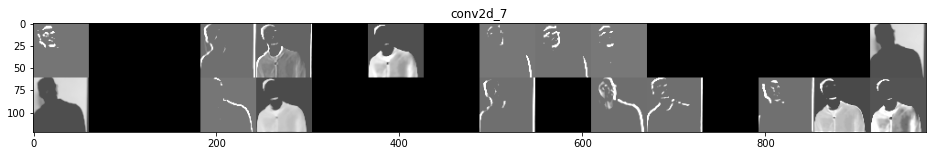

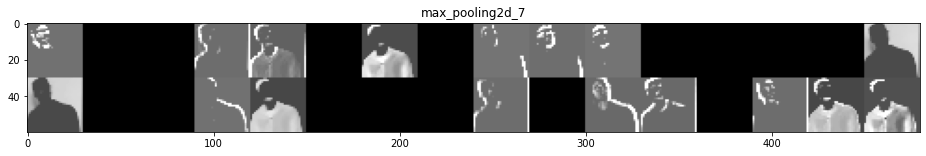

In [42]:
layer_names = []
for layer in classifier.layers[:12]:
    layer_names.append(layer.name) 
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1] 
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): 
        try:
            for row in range(images_per_row):
                channel_image = layer_activation[0,
                                                :, :,
                                                col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                            row * size : (row + 1) * size] = channel_image
        except:
            pass
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto' ,cmap="gray")